In [1]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/Volumes/DM/AU/LinkedIN/Data/Social_Network_Ads.csv.xls')

In [9]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

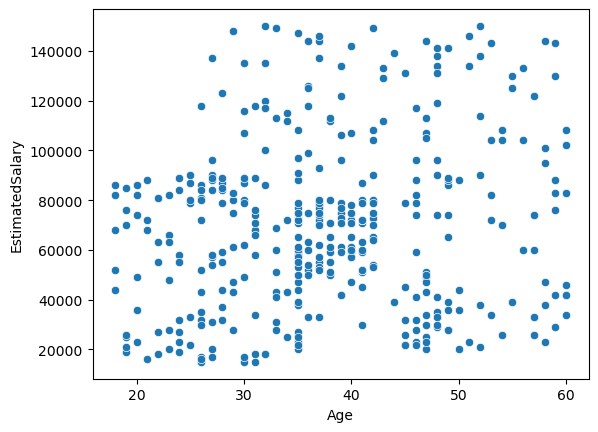

In [11]:
import seaborn as sns
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1])

In [16]:
type(df.iloc[:,-1])

pandas.core.series.Series

In [17]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [19]:
import tensorflow as tf
#from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

2025-05-02 14:24:16.045112: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/anaconda3/envs/AU/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.3368 - loss: 5288.8999 - val_accuracy: 0.4000 - val_loss: 1694.7094
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4380 - loss: 1021.1124 - val_accuracy: 0.6000 - val_loss: 929.8121
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6560 - loss: 700.6072 - val_accuracy: 0.4000 - val_loss: 351.2848
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4212 - loss: 349.3425 - val_accuracy: 0.6000 - val_loss: 253.1734
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5899 - loss: 161.9116 - val_accuracy: 0.6000 - val_loss: 118.9605
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5378 - loss: 97.1123 - val_accuracy: 0.6000 - val_loss: 114.3147
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5661 - loss: 81.4263 - val_accuracy: 0.6000 - val_loss: 94.9473
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5188 - loss

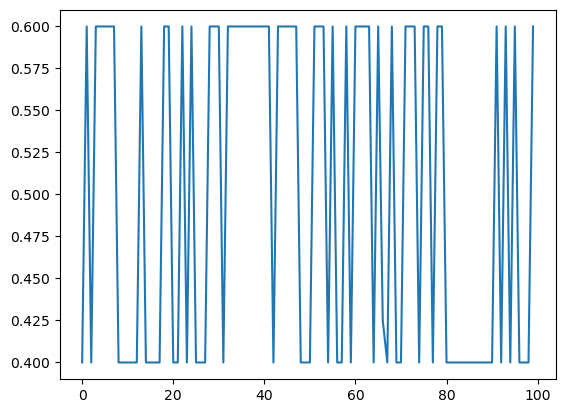

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

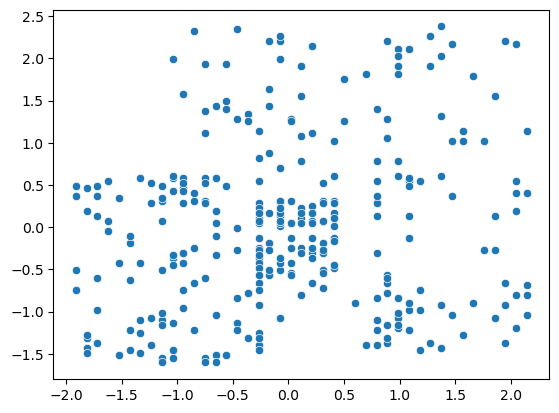

In [30]:
sns.scatterplot(x=X_train_scaled[:,0],y=X_train_scaled[:,1])

In [31]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



/usr/local/anaconda3/envs/AU/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100,verbose=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6300 - loss: 0.6779 - val_accuracy: 0.8125 - val_loss: 0.6300
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8067 - loss: 0.6215 - val_accuracy: 0.8000 - val_loss: 0.5738
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7949 - loss: 0.5845 - val_accuracy: 0.8000 - val_loss: 0.5270
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8137 - loss: 0.5356 - val_accuracy: 0.7875 - val_loss: 0.4851
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8359 - loss: 0.4964 - val_accuracy: 0.7875 - val_loss: 0.4508
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8330 - loss: 0.4762 - val_accuracy: 0.7875 - val_loss: 0.4232
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8633 - loss: 0.4278 - val_accuracy: 0.8125 - val_loss: 0.3979
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8800 - loss: 0.3952 - val_accuracy: 0.

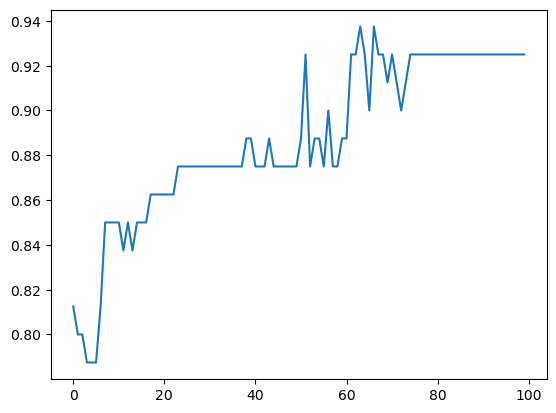

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])